In [39]:
import torch
import h5py
import numpy as np
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import pickle
from sklearn.preprocessing import normalize
from scipy.sparse import lil_matrix, csr_matrix, hstack
from tqdm import tqdm
import math

In [47]:
# 변수 선언 block
train_rec_file_list = ["./final_recs/Chanho_recs/train_recs/CF_rec_clf_dim_64.pickle",
                       "./final_recs/Chanho_recs/train_recs/Graph_rec_clf_1_8_depth_3.pickle",
                       "./final_recs/Chanho_recs/train_recs/Graph_rec_clf_1_8_depth_1.pickle",
                       "./final_recs/Junwon_recs/inference_train_classification_DNN_fc_layer_sizes_2048-1024-512-256_batch_16_seed_0.pkl",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncFC_PoolPMA_CplNone_NumEnc7_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncFC_PoolPMA_CplNone_NumEnc9_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncFC_PoolPMA_CplNone_NumEnc10_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncFC_PoolPMA_CplPooled_NumEnc5_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncFC_PoolPMA_CplPooled_NumEnc8_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplNone_NumEnc8_NumDec3_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc2_NumDec0_Hid512_Emb512_Ind8.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec0_Hid512_Emb512_Ind16.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec3_Hid512_Emb512_Ind6.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec3_Hid512_Emb512_Ind7.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec3_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc4_NumDec3_Hid512_Emb512_Ind6.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc6_NumDec0_Hid512_Emb512_Ind29.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_SA_PoolPMA_CplEncoded_NumEnc4_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_SA_PoolPMA_CplEncoded_NumEnc8_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_SA_PoolPMA_CplNone_NumEnc2_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_SA_PoolPMA_CplNone_NumEnc3_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_SA_PoolPMA_CplNone_NumEnc10_NumDec1_Hid512_Emb512_Ind10.pickle",
                      ]

valid_rec_file_list = ["./final_recs/Chanho_recs/valid_recs/CF_rec_clf_dim_64.pickle",
                       "./final_recs/Chanho_recs/valid_recs/Graph_rec_clf_1_8_depth_3.pickle",
                       "./final_recs/Chanho_recs/valid_recs/Graph_rec_clf_1_8_depth_1.pickle",
                       "./final_recs/Junwon_recs/inference_valid_clf_classification_DNN_fc_layer_sizes_2048-1024-512-256_batch_16_seed_0.pkl",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncFC_PoolPMA_CplNone_NumEnc7_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncFC_PoolPMA_CplNone_NumEnc9_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncFC_PoolPMA_CplNone_NumEnc10_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncFC_PoolPMA_CplPooled_NumEnc5_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncFC_PoolPMA_CplPooled_NumEnc8_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplNone_NumEnc8_NumDec3_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc2_NumDec0_Hid512_Emb512_Ind8.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec0_Hid512_Emb512_Ind16.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec3_Hid512_Emb512_Ind6.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec3_Hid512_Emb512_Ind7.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec3_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc4_NumDec3_Hid512_Emb512_Ind6.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc6_NumDec0_Hid512_Emb512_Ind29.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_SA_PoolPMA_CplEncoded_NumEnc4_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_SA_PoolPMA_CplEncoded_NumEnc8_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_SA_PoolPMA_CplNone_NumEnc2_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_SA_PoolPMA_CplNone_NumEnc3_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_SA_PoolPMA_CplNone_NumEnc10_NumDec1_Hid512_Emb512_Ind10.pickle",
                      ]

train_path = './Container/train'

valid_path = './Container/valid_clf'

state_dict_save_path = "./ensemble_model/ensemble_model_best_clf.pt"

loss_fig_path = "./ensemble_model/ensemble_clf_loss.png"
acc_fig_path = "./ensemble_model/ensemble_clf_acc.png"

epochs = 20

In [48]:
class RecDataset(Dataset):
    def __init__(self, recs_list, answer_dict, query_num, item_num, transform=None, target_transform=None):
        # rec_matrix = [query num, model_num, item_num]
        self.rec_matrix = []
        for i in range(query_num):
            self.rec_matrix.append(lil_matrix((len(recs_list), item_num)))
        for i, recs in enumerate(recs_list):
            for query in tqdm(recs.keys()):
                rec = recs[query]
                rec_items, rec_scores = [rec_ for rec_, score in rec], [score for rec_, score in rec]
                rec_scores = normalize(np.array(rec_scores)[:,np.newaxis], axis=0).ravel()
                for item, score in zip(rec_items, rec_scores):
                    self.rec_matrix[query][i, item] = score
        self.labels = answer_dict
        self.transform = transform
        self.target_transform = target_transform
        self.device = "cuda" if torch.cuda.is_available() else "cpu"

    def __len__(self):
        return len(self.rec_matrix)

    def __getitem__(self, idx):
        rec_matrix = self.rec_matrix[idx].toarray()
        label = self.labels[idx]
        if self.transform:
            rec_matrix = self.transform(rec_matrix).to(self.device)
        if self.target_transform:
            label = self.target_transform(label)
        return rec_matrix.to(self.device), label.to(self.device)

In [49]:
class Network(nn.Module):
    def __init__(self, model_len, k=10):
        super(Network, self).__init__()
        self.w1 = torch.nn.Parameter(torch.rand(k, model_len))
        self.w2 = torch.nn.Parameter(torch.rand(1, k))
        
    def forward(self, x):
        #import ipdb; ipdb.set_trace()
        x = x.float()
        x = torch.einsum('nm, bmp -> bnp', self.w1, x)
        x = torch.einsum('nm, bmp -> bnp', self.w2, x).squeeze(1)
        return x

In [43]:
recs_list = []
for rec_file in train_rec_file_list:
    with open(rec_file, 'rb') as f:
        recs = pickle.load(f)
        recs_list.append(recs)

query_num = len(recs_list[0])
item_num = 20

h5f_train = h5py.File(train_path, 'r')
answer = h5f_train['labels_int_enc'][:].astype(np.int64)
h5f_train.close()

answer_dict = {}
for i, ans in enumerate(answer):
    answer_dict[i] = ans

train_data = RecDataset(recs_list, answer_dict, query_num, item_num, transform=torch.Tensor, target_transform=torch.tensor)
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
###############

recs_list = []
for rec_file in valid_rec_file_list:
    with open(rec_file, 'rb') as f:
        recs = pickle.load(f)
        recs_list.append(recs)

query_num = len(recs_list[0])
item_num = 20

h5f_valid = h5py.File(valid_path, 'r')
answer = h5f_valid['labels_int_enc'][:].astype(np.int64)
h5f_valid.close()

answer_dict = {}
for i, ans in enumerate(answer):
    answer_dict[i] = ans

test_data = RecDataset(recs_list, answer_dict, query_num, item_num, transform=torch.Tensor, target_transform=torch.tensor)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

100%|████████████████████████████████████████████████████████████████████████████| 7848/7848 [00:00<00:00, 9712.86it/s]


In [51]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Network(len(train_rec_file_list), k=10).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    total_loss = 0
    for batch, (X, y) in tqdm(enumerate(dataloader),total=len(dataloader)):
        pred = model(X)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / (batch + 1)
    print(f"Train loss: {avg_loss:>7f}")
    return avg_loss
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in tqdm(dataloader):
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss, correct

train_loss_lst = []
test_loss_lst = []
test_acc_lst = []
min_test_loss = math.inf
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loss, test_acc = test_loop(test_dataloader, model, loss_fn)
    train_loss_lst.append(train_loss)
    test_loss_lst.append(test_loss)
    test_acc_lst.append(test_acc)
    print(model.parameters())
    if test_loss < min_test_loss:
        print("save")
        min_test_loss = test_loss
        torch.save(model.state_dict(), state_dict_save_path)
print("Done!")

Epoch 1
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:26<00:00, 14.02it/s]


Train loss: 1.851878


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:09<00:00, 13.55it/s]


Test Error: 
 Accuracy: 78.6%, Avg loss: 4.657953 

<generator object Module.parameters at 0x000001BDF186F660>
save
Epoch 2
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:26<00:00, 14.09it/s]


Train loss: 1.607570


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:09<00:00, 13.47it/s]


Test Error: 
 Accuracy: 78.6%, Avg loss: 4.032047 

<generator object Module.parameters at 0x000001BDF186FAC0>
save
Epoch 3
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:26<00:00, 14.11it/s]


Train loss: 1.384191


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:08<00:00, 13.72it/s]


Test Error: 
 Accuracy: 78.7%, Avg loss: 3.464534 

<generator object Module.parameters at 0x000001BDF186F270>
save
Epoch 4
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:25<00:00, 14.22it/s]


Train loss: 1.181137


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:09<00:00, 13.58it/s]


Test Error: 
 Accuracy: 78.7%, Avg loss: 2.941555 

<generator object Module.parameters at 0x000001BDF186F5F0>
save
Epoch 5
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:26<00:00, 14.09it/s]


Train loss: 0.995058


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:08<00:00, 13.74it/s]


Test Error: 
 Accuracy: 78.7%, Avg loss: 2.462493 

<generator object Module.parameters at 0x000001BDF186FAC0>
save
Epoch 6
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:26<00:00, 13.91it/s]


Train loss: 0.821448


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:09<00:00, 13.57it/s]


Test Error: 
 Accuracy: 78.6%, Avg loss: 2.009687 

<generator object Module.parameters at 0x000001BDF186F5F0>
save
Epoch 7
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:25<00:00, 14.33it/s]


Train loss: 0.657602


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:09<00:00, 13.46it/s]


Test Error: 
 Accuracy: 78.5%, Avg loss: 1.575907 

<generator object Module.parameters at 0x000001BDF186F200>
save
Epoch 8
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:27<00:00, 13.56it/s]


Train loss: 0.503179


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:09<00:00, 13.45it/s]


Test Error: 
 Accuracy: 78.4%, Avg loss: 1.179162 

<generator object Module.parameters at 0x000001BDF186F430>
save
Epoch 9
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:26<00:00, 13.77it/s]


Train loss: 0.385523


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:08<00:00, 15.06it/s]


Test Error: 
 Accuracy: 78.2%, Avg loss: 0.938594 

<generator object Module.parameters at 0x000001BDF186F510>
save
Epoch 10
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:27<00:00, 13.40it/s]


Train loss: 0.350084


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:07<00:00, 16.46it/s]


Test Error: 
 Accuracy: 78.1%, Avg loss: 0.906916 

<generator object Module.parameters at 0x000001BDF186F430>
save
Epoch 11
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:27<00:00, 13.33it/s]


Train loss: 0.340681


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:07<00:00, 15.64it/s]


Test Error: 
 Accuracy: 78.2%, Avg loss: 0.906083 

<generator object Module.parameters at 0x000001BDF186F5F0>
save
Epoch 12
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:27<00:00, 13.19it/s]


Train loss: 0.332474


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:08<00:00, 14.73it/s]


Test Error: 
 Accuracy: 78.1%, Avg loss: 0.909912 

<generator object Module.parameters at 0x000001BDF186F510>
Epoch 13
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:27<00:00, 13.45it/s]


Train loss: 0.325132


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:09<00:00, 13.21it/s]


Test Error: 
 Accuracy: 78.1%, Avg loss: 0.910213 

<generator object Module.parameters at 0x000001BDF186F4A0>
Epoch 14
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:26<00:00, 13.83it/s]


Train loss: 0.318400


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:09<00:00, 13.06it/s]


Test Error: 
 Accuracy: 78.2%, Avg loss: 0.916068 

<generator object Module.parameters at 0x000001BDF186FBA0>
Epoch 15
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:26<00:00, 14.00it/s]


Train loss: 0.312443


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:09<00:00, 13.20it/s]


Test Error: 
 Accuracy: 78.3%, Avg loss: 0.917757 

<generator object Module.parameters at 0x000001BDF186F430>
Epoch 16
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:26<00:00, 13.83it/s]


Train loss: 0.307009


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:09<00:00, 13.33it/s]


Test Error: 
 Accuracy: 78.3%, Avg loss: 0.922182 

<generator object Module.parameters at 0x000001BDF186F660>
Epoch 17
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:26<00:00, 14.06it/s]


Train loss: 0.302242


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:09<00:00, 13.38it/s]


Test Error: 
 Accuracy: 78.3%, Avg loss: 0.927607 

<generator object Module.parameters at 0x000001BDF186F5F0>
Epoch 18
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:25<00:00, 14.33it/s]


Train loss: 0.297971


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:09<00:00, 13.36it/s]


Test Error: 
 Accuracy: 78.3%, Avg loss: 0.937799 

<generator object Module.parameters at 0x000001BDF186F270>
Epoch 19
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:26<00:00, 14.03it/s]


Train loss: 0.294190


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:08<00:00, 13.92it/s]


Test Error: 
 Accuracy: 78.2%, Avg loss: 0.932780 

<generator object Module.parameters at 0x000001BDF186F5F0>
Epoch 20
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:25<00:00, 14.34it/s]


Train loss: 0.290838


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:08<00:00, 13.75it/s]

Test Error: 
 Accuracy: 78.2%, Avg loss: 0.939243 

<generator object Module.parameters at 0x000001BDF186F660>
Done!


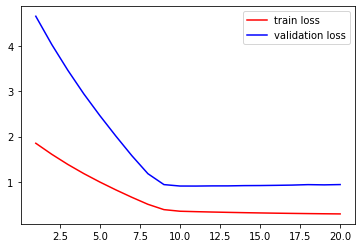

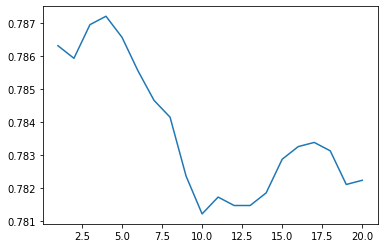

In [52]:
import matplotlib.pyplot as plt
epoch_lst = list(range(1, epochs+1))
plt.plot(epoch_lst, train_loss_lst, 'r', label='train loss')
plt.plot(epoch_lst, test_loss_lst, 'b', label = 'validation loss')
plt.legend()
plt.savefig(loss_fig_path)
plt.show()

plt.plot(epoch_lst, test_acc_lst)
plt.savefig(acc_fig_path)
plt.show()